In [3]:
# Load the mergerd.csv file to begin EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('mergerd.csv', encoding='UTF-8-SIG')


In [2]:
# Display the first few rows and basic info to understand the structure of the data
print("Dataset Head:")
print(data.head())
print("\
Dataset Info:")
print(data.info())

Dataset Head:
  TransactionID CustomerID    Coustmer Name ProductID TransactionDate  \
0        T00001      C0199   Andrea Jenkins      P067      25-08-2024   
1        T00112      C0146  Brittany Harvey      P067      27-05-2024   
2        T00166      C0127  Kathryn Stevens      P067      25-04-2024   
3        T00272      C0087  Travis Campbell      P067      26-03-2024   
4        T00363      C0070    Timothy Perez      P067      21-03-2024   

   Quantity  TotalValue   Price         Region  \
0         1      300.68  300.68         Europe   
1         1      300.68  300.68           Asia   
2         1      300.68  300.68         Europe   
3         2      601.36  300.68  South America   
4         3      902.04  300.68         Europe   

                       ProductName     Category  
0  ComfortLiving Bluetooth Speaker  Electronics  
1  ComfortLiving Bluetooth Speaker  Electronics  
2  ComfortLiving Bluetooth Speaker  Electronics  
3  ComfortLiving Bluetooth Speaker  Electronic

**Data Cleaning**

In [4]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
TransactionID      0
CustomerID         0
Coustmer Name      0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
Region             0
ProductName        0
Category           0
dtype: int64


In [5]:
# Drop duplicates if any
data = data.drop_duplicates()

# Handle missing values (fill or drop based on data)
data = data.dropna()  # Dropping rows with missing values (simple solution)

print("\nCleaned Data:")
print(data.info())


Cleaned Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   Coustmer Name    1000 non-null   object 
 3   ProductID        1000 non-null   object 
 4   TransactionDate  1000 non-null   object 
 5   Quantity         1000 non-null   int64  
 6   TotalValue       1000 non-null   float64
 7   Price            1000 non-null   float64
 8   Region           1000 non-null   object 
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB
None


**EDA(Exploratory Data Analysis)**

In [6]:
# Summary statistics
summary_stats = data.describe()
print("\
Summary Statistics:")
print(summary_stats)

Summary Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


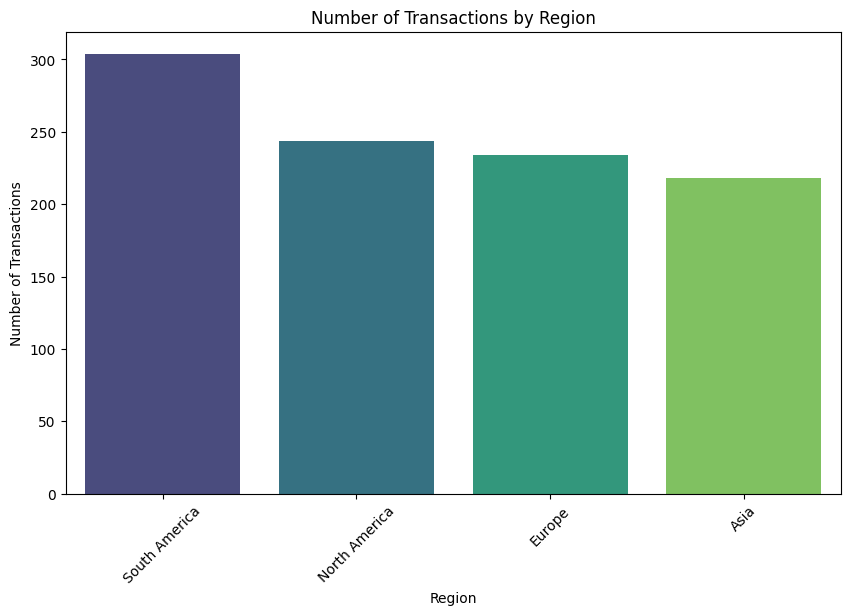

In [7]:
# Plotting sales trends by region
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region', order=data['Region'].value_counts().index, palette='viridis')
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

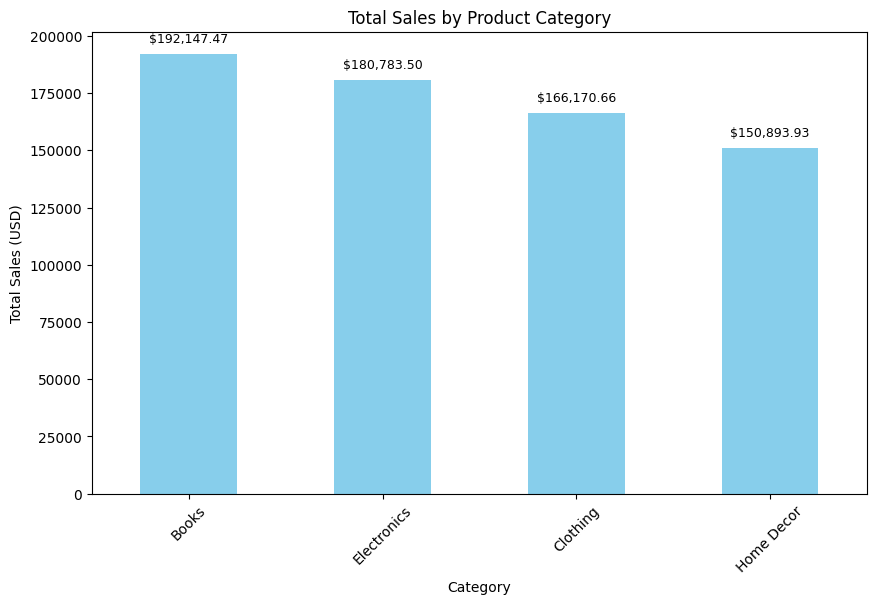

In [11]:
# Plotting total sales by product category
plt.figure(figsize=(10, 6))
category_sales = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
for i, value in enumerate(category_sales):
    plt.text(i, value + 0.02 * max(category_sales), f'${value:,.2f}', ha='center', va='bottom', fontsize=9)
plt.show()

In [12]:
# Insight 1: Top-performing regions by total sales
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Total Sales by Region:")
print(region_sales)

Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [13]:
# Insight 2: Most popular product categories by quantity sold
category_quantity = data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Quantity Sold by Product Category:")
print(category_quantity)

Quantity Sold by Product Category:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


In [14]:
# Insight 3: Average transaction value by region
avg_transaction_value = data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("Average Transaction Value by Region:")
print(avg_transaction_value)

Average Transaction Value by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


In [15]:
# Insight 4: Top customers by total spending
customer_spending = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Customers by Total Spending:")
print(customer_spending)

Top 5 Customers by Total Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [16]:
# Insight 5: Seasonal trends in transactions (monthly analysis)
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d-%m-%Y')
data['Month'] = data['TransactionDate'].dt.month
monthly_sales = data.groupby('Month')['TotalValue'].sum()
print("Monthly Sales Trends:")
print(monthly_sales)

Monthly Sales Trends:
Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64
